In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 

In [9]:
# Load the data
#360 ticks per second, frequency = 360 Hz
data_100 = pd.read_csv('100.csv')


In [10]:
data_106 = pd.read_csv('106.csv')
data_114 = pd.read_csv('114.csv')
data_119 = pd.read_csv('119.csv')

In [11]:
m = data_100.shape[0]
n = data_100.shape[1]
print('Number of rows: ', m)
print('Number of columns: ', n)


Number of rows:  650000
Number of columns:  4


In [12]:
# Plot the data
columns_100 = data_100.columns
columns_106 = data_106.columns
columns_114 = data_114.columns
columns_119 = data_119.columns

print(columns_100)
print(columns_106)
print(columns_114)
print(columns_119)

Index(['Unnamed: 0', 'time_ms', 'MLII', 'V5'], dtype='object')
Index(['Unnamed: 0', 'time_ms', 'MLII', 'V1'], dtype='object')
Index(['Unnamed: 0', 'time_ms', 'V5', 'MLII'], dtype='object')
Index(['Unnamed: 0', 'time_ms', 'MLII', 'V1'], dtype='object')


In [13]:
mean1 = np.mean(data_100[columns_100[2]])
mean2 = np.mean(data_100[columns_100[3]])

var1 = np.var(data_100[columns_100[2]])
var2 = np.var(data_100[columns_100[3]])

std1 = np.std(data_100[columns_100[2]])
std2 = np.std(data_100[columns_100[3]])

print('Mean: ', mean1)
print('Variance: ', var1)
print('Standard deviation: ', std1)

print('Mean: ', mean2)
print('Variance: ', var2)
print('Standard deviation: ', std2)


Mean:  -0.3062989769230769
Variance:  0.037326063082030236
Standard deviation:  0.19319954213721688
Mean:  -0.19103443076923085
Variance:  0.021967159876060596
Standard deviation:  0.14821322436294473


C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


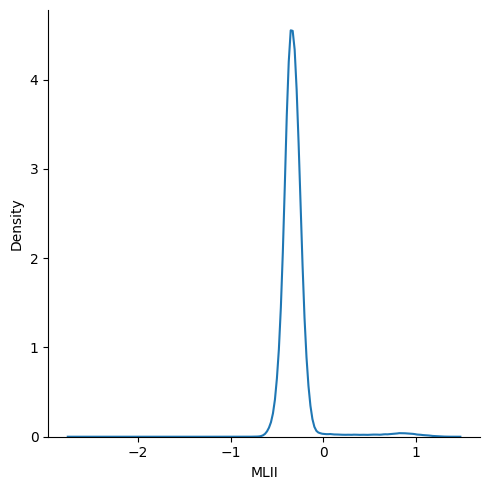

In [14]:
sns.displot(data_100[columns_100[2]],kind='kde')

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


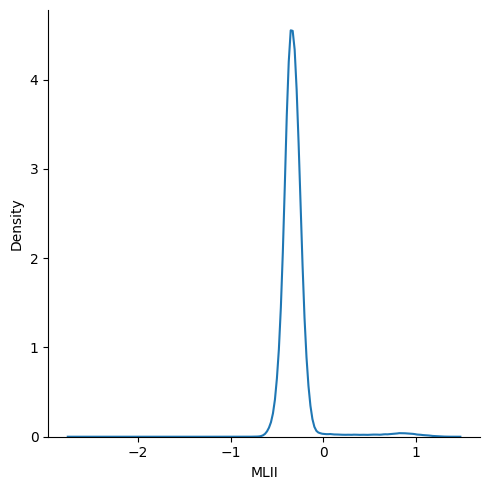

In [15]:
sns.displot(data_100[columns_106[2]],kind='kde')

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


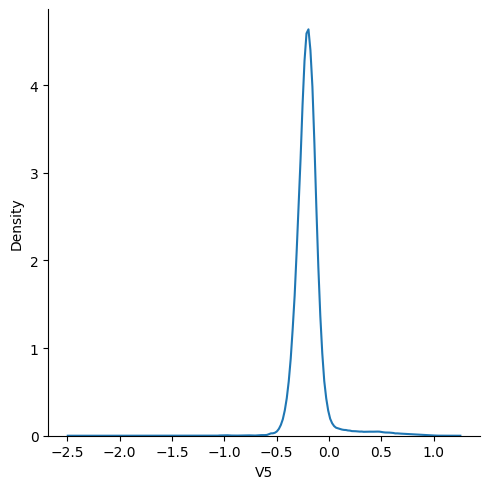

In [16]:
sns.displot(data_100[columns_114[2]],kind='kde')

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


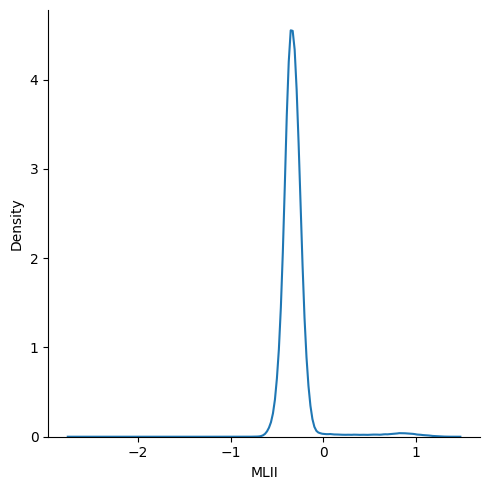

In [17]:
sns.displot(data_100[columns_119[2]],kind='kde')

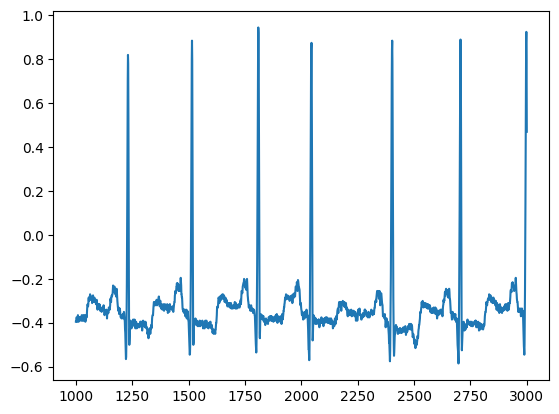

In [18]:
subset_data = data_100[columns_100[2]].loc[1000:3000]
plt.figure()
plt.plot(subset_data, label=columns_100[2])


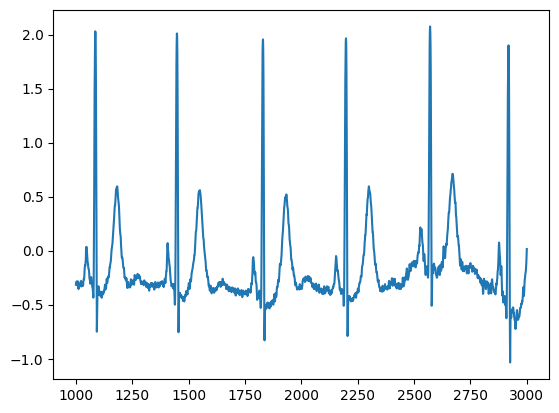

In [19]:
subset_data_106 = data_106[columns_106[2]].loc[1000:3000]
plt.figure()
plt.plot(subset_data_106, label=columns_106[2])

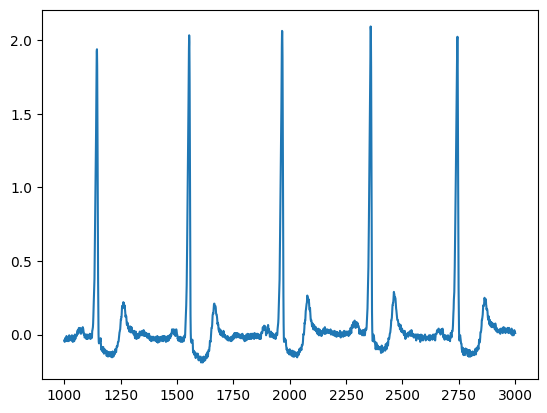

In [20]:
subset_data_114 = data_114[columns_114[3]].loc[1000:3000]
plt.figure()
plt.plot(subset_data_114, label=columns_114[3])

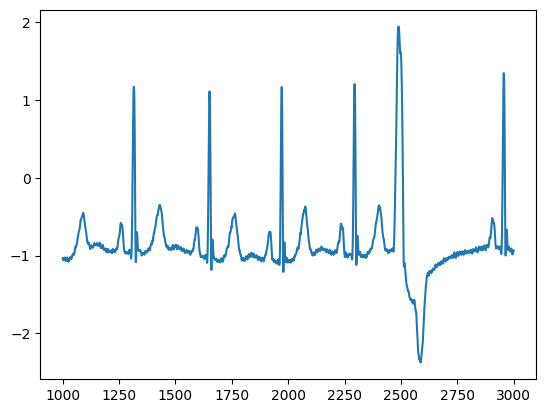

In [21]:
subset_data_119 = data_119[columns_119[2]].loc[1000:3000]
plt.figure()
plt.plot(subset_data_119, label=columns_119[2])

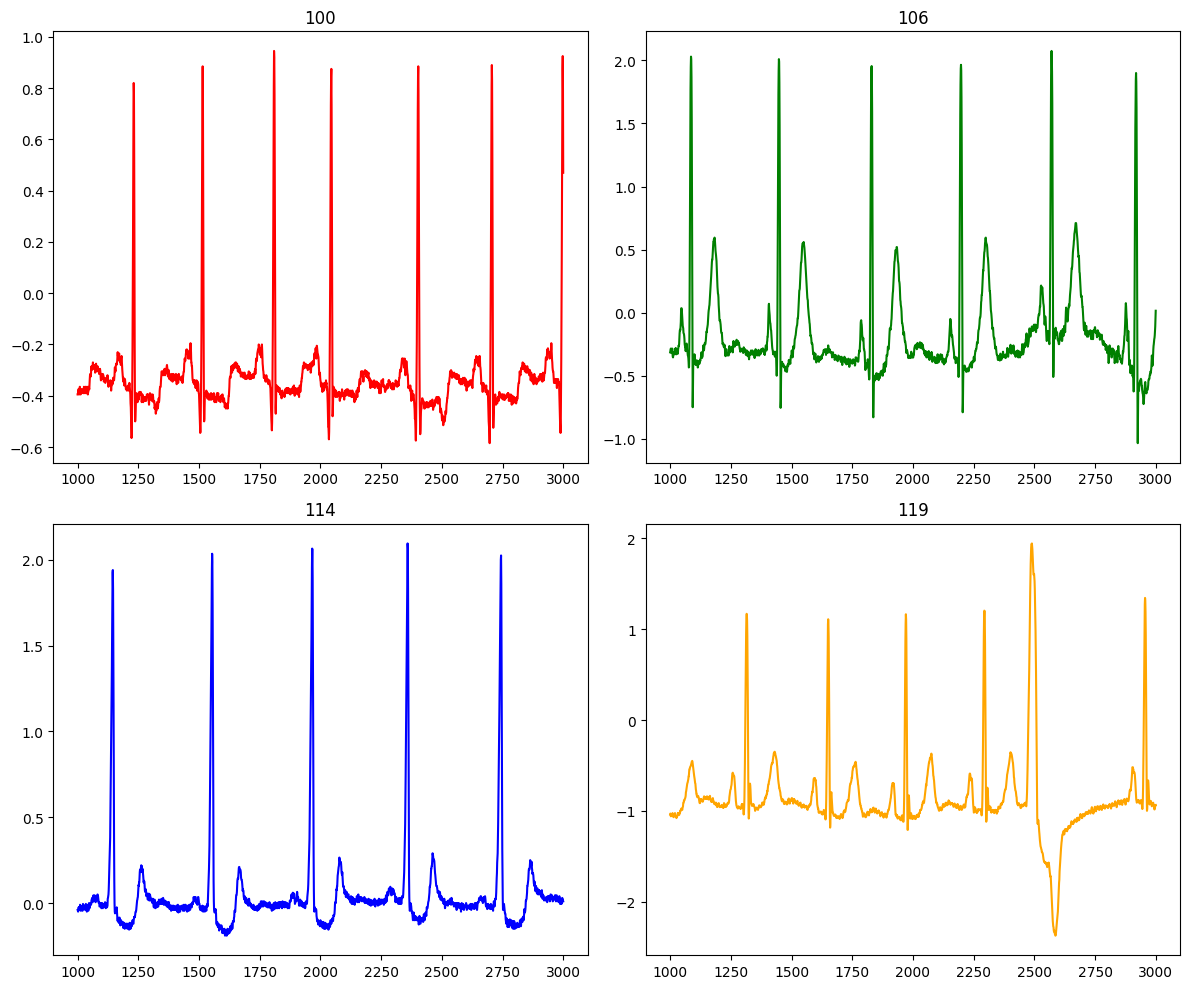

In [22]:
# Data
x = np.linspace(1000, 3000, 2001)  # Adjusted x values for the range 1000-3000
subset_data = data_100[columns_100[2]].loc[1000:3000]  # Subset data for the range 1000-3000
subset_data_106 = data_106[columns_106[2]].loc[1000:3000]  # Subset data for the range 1000-3000
subset_data_114 = data_114[columns_114[3]].loc[1000:3000]  # Subset data for the range 1000-3000
subset_data_119 = data_119[columns_119[2]].loc[1000:3000]  # Subset data for the range 1000-3000

# Create figure and axes with adjusted dimensions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot data on each subplot
axs[0, 0].plot(x, subset_data, color='r')
axs[0, 0].set_title('100')

axs[0, 1].plot(x, subset_data_106, color='g')
axs[0, 1].set_title('106')

axs[1, 0].plot(x, subset_data_114, color='b')
axs[1, 0].set_title('114')

axs[1, 1].plot(x, subset_data_119, color='orange')
axs[1, 1].set_title('119')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

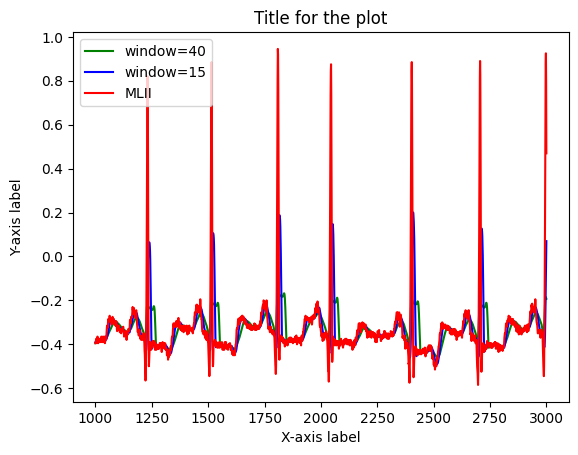

In [24]:
# Moving average calculation and plot for data_100
moving_avg_100_15 = data_100[columns_100[2]].rolling(window=15).mean().loc[1000:3000]
moving_avg_100_40 = data_100[columns_100[2]].rolling(window=40).mean().loc[1005:3005]  # Adjusted window size
plt.figure()
plt.plot(x, moving_avg_100_40, color='green', label='window=40')
plt.plot(x, moving_avg_100_15, color='blue', label='window=15')
plt.plot(x, subset_data, color='red', label=columns_100[2])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title for the plot')
plt.legend()


In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [26]:
adf_test(data_100[columns_100[1]].loc[100:10000])
kpss_test(data_100[columns_100[1]].loc[100:10000])


Results of Dickey-Fuller Test:
Test Statistic                    0.082328
p-value                           0.964834
#Lags Used                        0.000000
Number of Observations Used    9900.000000
Critical Value (1%)              -3.431011
Critical Value (5%)              -2.861832
Critical Value (10%)             -2.566925
dtype: float64
Results of KPSS Test:
Test Statistic           16.602248
p-value                   0.010000
#Lags Used               59.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [27]:
# ADF test on moving_avg_100_15
adf_result_15 = adf_test(moving_avg_100_15.loc[200:10000])
print("Results of ADF Test for moving_avg_100_15:")
print(adf_result_15)

# KPSS test on moving_avg_100_15
kpss_result_15 = kpss_test(moving_avg_100_15.loc[200:10000])
print("\nResults of KPSS Test for moving_avg_100_15:")
print(kpss_result_15)

# ADF test on moving_avg_100_40
adf_result_40 = adf_test(moving_avg_100_40.loc[200:10000])
print("\nResults of ADF Test for moving_avg_100_40:")
print(adf_result_40)

# KPSS test on moving_avg_100_40
kpss_result_40 = kpss_test(moving_avg_100_40.loc[200:10000])
print("\nResults of KPSS Test for moving_avg_100_40:")
print(kpss_result_40)


Results of Dickey-Fuller Test:
Test Statistic                -6.350491e+00
p-value                        2.618248e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.977000e+03
Critical Value (1%)           -3.433662e+00
Critical Value (5%)           -2.863003e+00
Critical Value (10%)          -2.567549e+00
dtype: float64
Results of ADF Test for moving_avg_100_15:
None
Results of KPSS Test:
Test Statistic            0.068236
p-value                   0.100000
#Lags Used               27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

Results of KPSS Test for moving_avg_100_15:
None
Results of Dickey-Fuller Test:
Test Statistic                -7.064178e+00
p-value                        5.131329e-10
#Lags Used                     2.600000e+01
Number of Observations Used    1.974000e+03
Critical Value (1%)           -3.433667e+00
Critical Value 

C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')
C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [28]:
data_100['detrended_diff']= data_100[columns_100[1]].diff()
data_100['detrended_diff'].dropna(inplace=True)
# adf_test(data['detrended_diff'].loc[200:10000])
kpss_test(data_100['detrended_diff'].loc[200:10000])

Results of KPSS Test:


Test Statistic             0.009548
p-value                    0.100000
#Lags Used               119.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [29]:
data_100['detrended_diff_2']=data_100['detrended_diff'].diff()
data_100['detrended_diff_2'].dropna(inplace=True)
# adf_test(data['detrended_diff_2'].loc[200:10000])
kpss_test(data_100['detrended_diff_2'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.009364
p-value                    0.100000
#Lags Used               116.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


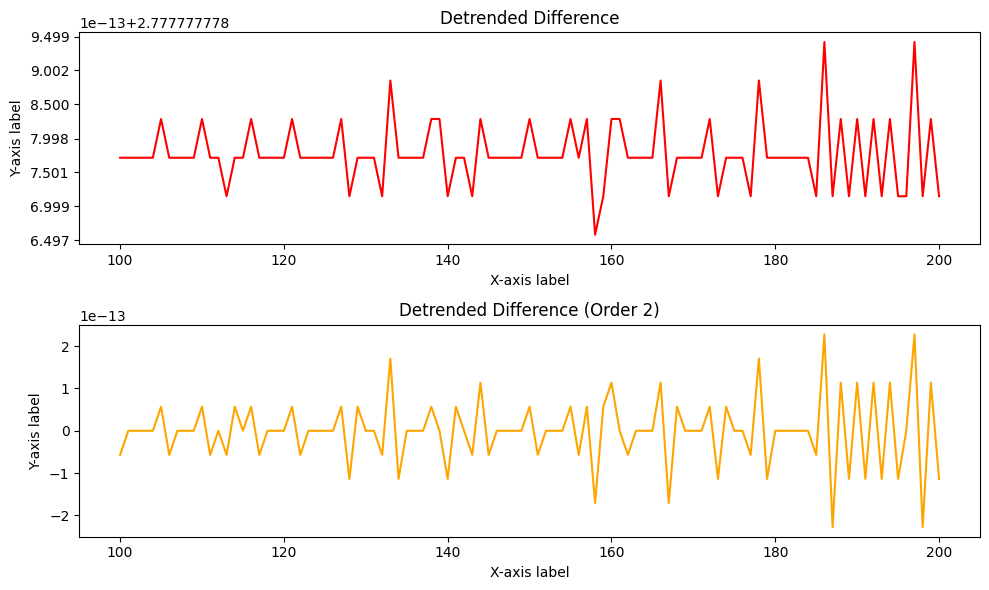

In [30]:
plt.figure(figsize=(10, 6))

# Plot detrended differences
plt.subplot(2, 1, 1)  # (rows, columns, index)
data_100['detrended_diff'].loc[100:200].plot(color='red', label='Detrended Difference')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference')

# Plot second-order detrended differences
plt.subplot(2, 1, 2)  # (rows, columns, index)
data_100['detrended_diff_2'].loc[100:200].plot(color='orange', label='Detrended Difference (Order 2)')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference (Order 2)')

plt.tight_layout()
plt.show()


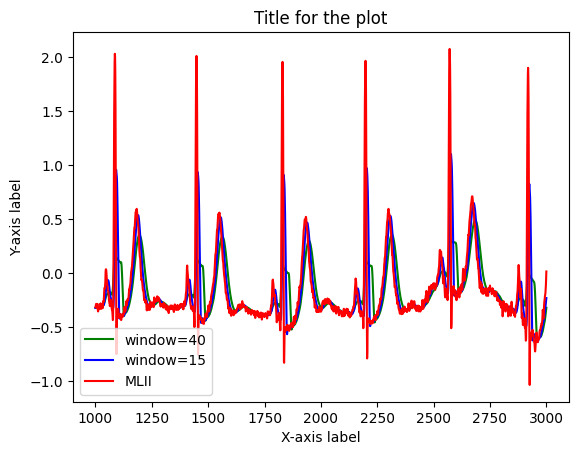

In [31]:
# Moving average calculation and plot for data_106
moving_avg_106_15 = data_106[columns_106[2]].rolling(window=15).mean().loc[1000:3000]
moving_avg_106_40 = data_106[columns_106[2]].rolling(window=40).mean().loc[1005:3005]  # Adjusted window size
plt.figure()
plt.plot(x, moving_avg_106_40, color='green', label='window=40')
plt.plot(x, moving_avg_106_15, color='blue', label='window=15')
plt.plot(x, subset_data_106, color='red', label=columns_106[2])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title for the plot')
plt.legend()


In [32]:
adf_test(data_106[columns_106[1]].loc[100:10000])
kpss_test(data_106[columns_106[1]].loc[100:10000])

Results of Dickey-Fuller Test:
Test Statistic                    0.082328
p-value                           0.964834
#Lags Used                        0.000000
Number of Observations Used    9900.000000
Critical Value (1%)              -3.431011
Critical Value (5%)              -2.861832
Critical Value (10%)             -2.566925
dtype: float64
Results of KPSS Test:
Test Statistic           16.602248
p-value                   0.010000
#Lags Used               59.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [33]:
# ADF test on moving_avg_106_15
adf_result_106_15 = adf_test(moving_avg_106_15.loc[200:10000])
print("Results of ADF Test for moving_avg_106_15:")
print(adf_result_106_15)

# KPSS test on moving_avg_106_15
kpss_result_106_15 = kpss_test(moving_avg_106_15.loc[200:10000])
print("\nResults of KPSS Test for moving_avg_106_15:")
print(kpss_result_106_15)

# ADF test on moving_avg_106_40
adf_result_106_40 = adf_test(moving_avg_106_40.loc[200:10000])
print("\nResults of ADF Test for moving_avg_106_40:")
print(adf_result_106_40)

# KPSS test on moving_avg_106_40
kpss_result_106_40 = kpss_test(moving_avg_106_40.loc[200:10000])
print("\nResults of KPSS Test for moving_avg_106_40:")
print(kpss_result_106_40)


Results of Dickey-Fuller Test:
Test Statistic                   -5.351709
p-value                           0.000004
#Lags Used                       22.000000
Number of Observations Used    1978.000000
Critical Value (1%)              -3.433660
Critical Value (5%)              -2.863002
Critical Value (10%)             -2.567548
dtype: float64
Results of ADF Test for moving_avg_106_15:
None
Results of KPSS Test:
Test Statistic            0.102511
p-value                   0.100000
#Lags Used               27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

Results of KPSS Test for moving_avg_106_15:
None
Results of Dickey-Fuller Test:
Test Statistic                -7.682458e+00
p-value                        1.491415e-11
#Lags Used                     2.600000e+01
Number of Observations Used    1.974000e+03
Critical Value (1%)           -3.433667e+00
Critical Value (5%)   

C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')
C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [34]:
data_106['detrended_diff']= data_106[columns_106[1]].diff()
data_106['detrended_diff'].dropna(inplace=True)
kpss_test(data_106['detrended_diff'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.009548
p-value                    0.100000
#Lags Used               119.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [35]:
data_106['detrended_diff_2']=data_106['detrended_diff'].diff()
data_106['detrended_diff_2'].dropna(inplace=True)
kpss_test(data_106['detrended_diff_2'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.009364
p-value                    0.100000
#Lags Used               116.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


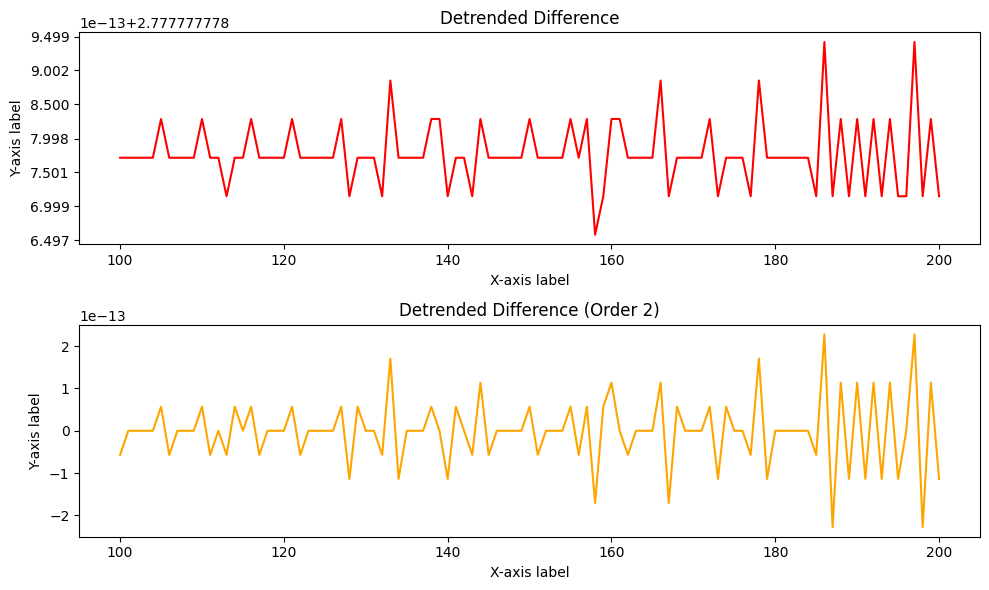

In [36]:
plt.figure(figsize=(10, 6))

# Plot detrended differences
plt.subplot(2, 1, 1)  # (rows, columns, index)
data_106['detrended_diff'].loc[100:200].plot(color='red', label='Detrended Difference')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference')

# Plot second-order detrended differences
plt.subplot(2, 1, 2)  # (rows, columns, index)
data_106['detrended_diff_2'].loc[100:200].plot(color='orange', label='Detrended Difference (Order 2)')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference (Order 2)')

plt.tight_layout()
plt.show()


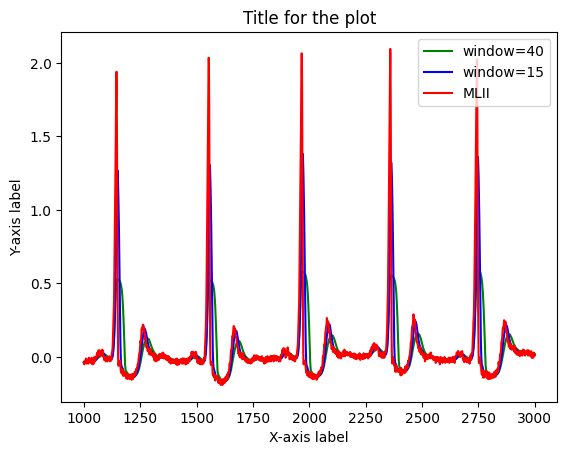

In [37]:
# Moving average calculation and plot for data_114
moving_avg_114_15 = data_114[columns_114[3]].rolling(window=15).mean().loc[1000:3000]
moving_avg_114_40 = data_114[columns_114[3]].rolling(window=40).mean().loc[1005:3005]  # Adjusted window size
plt.figure()
plt.plot(x, moving_avg_114_40, color='green', label='window=40')
plt.plot(x, moving_avg_114_15, color='blue', label='window=15')
plt.plot(x, subset_data_114, color='red', label=columns_114[3])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title for the plot')
plt.legend()


In [38]:
adf_test(data_114[columns_114[1]].loc[100:10000])
kpss_test(data_114[columns_114[1]].loc[100:10000])

Results of Dickey-Fuller Test:
Test Statistic                    0.082328
p-value                           0.964834
#Lags Used                        0.000000
Number of Observations Used    9900.000000
Critical Value (1%)              -3.431011
Critical Value (5%)              -2.861832
Critical Value (10%)             -2.566925
dtype: float64
Results of KPSS Test:
Test Statistic           16.602248
p-value                   0.010000
#Lags Used               59.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [39]:
data_114['detrended_diff']= data_114[columns_114[1]].diff()
data_114['detrended_diff'].dropna(inplace=True)
kpss_test(data_114['detrended_diff'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.009548
p-value                    0.100000
#Lags Used               119.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [40]:
data_114['detrended_diff_2']=data_114['detrended_diff'].diff()
data_114['detrended_diff_2'].dropna(inplace=True)
kpss_test(data_114['detrended_diff_2'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.009364
p-value                    0.100000
#Lags Used               116.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


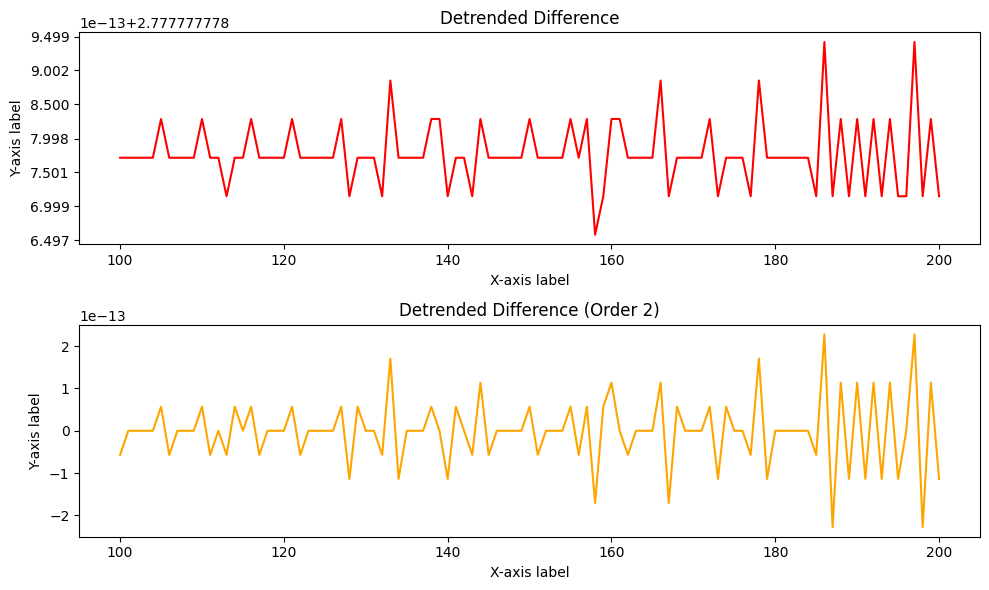

In [41]:
plt.figure(figsize=(10, 6))

# Plot detrended differences
plt.subplot(2, 1, 1)  # (rows, columns, index)
data_114['detrended_diff'].loc[100:200].plot(color='red', label='Detrended Difference')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference')

# Plot second-order detrended differences
plt.subplot(2, 1, 2)  # (rows, columns, index)
data_114['detrended_diff_2'].loc[100:200].plot(color='orange', label='Detrended Difference (Order 2)')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference (Order 2)')

plt.tight_layout()
plt.show()


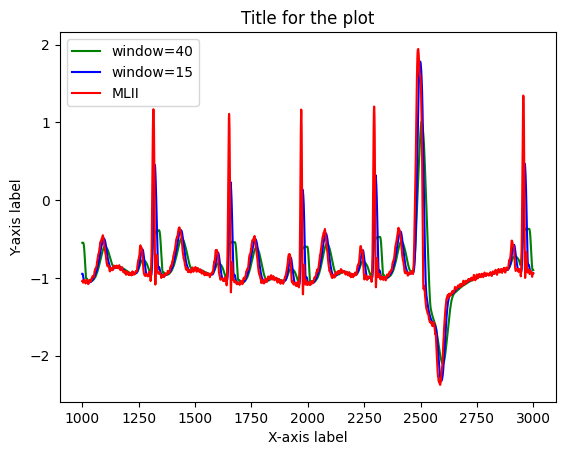

In [42]:
# Moving average calculation and plot for data_119
moving_avg_119_15 = data_119[columns_119[2]].rolling(window=15).mean().loc[1000:3000]
moving_avg_119_40 = data_119[columns_119[2]].rolling(window=40).mean().loc[1005:3005]  # Adjusted window size
plt.figure()
plt.plot(x, moving_avg_119_40, color='green', label='window=40')
plt.plot(x, moving_avg_119_15, color='blue', label='window=15')
plt.plot(x, subset_data_119, color='red', label=columns_119[2])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title for the plot')
plt.legend()


In [43]:
adf_test(data_119[columns_119[1]].loc[100:10000])
kpss_test(data_119[columns_119[1]].loc[100:10000])

Results of Dickey-Fuller Test:
Test Statistic                    0.082328
p-value                           0.964834
#Lags Used                        0.000000
Number of Observations Used    9900.000000
Critical Value (1%)              -3.431011
Critical Value (5%)              -2.861832
Critical Value (10%)             -2.566925
dtype: float64
Results of KPSS Test:
Test Statistic           16.602248
p-value                   0.010000
#Lags Used               59.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [44]:
data_119['detrended_diff']= data_119[columns_119[1]].diff()
data_119['detrended_diff'].dropna(inplace=True)
kpss_test(data_119['detrended_diff'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.009548
p-value                    0.100000
#Lags Used               119.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [45]:
data_119['detrended_diff_2']=data_119['detrended_diff'].diff()
data_119['detrended_diff_2'].dropna(inplace=True)
kpss_test(data_119['detrended_diff_2'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.009364
p-value                    0.100000
#Lags Used               116.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_14772\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


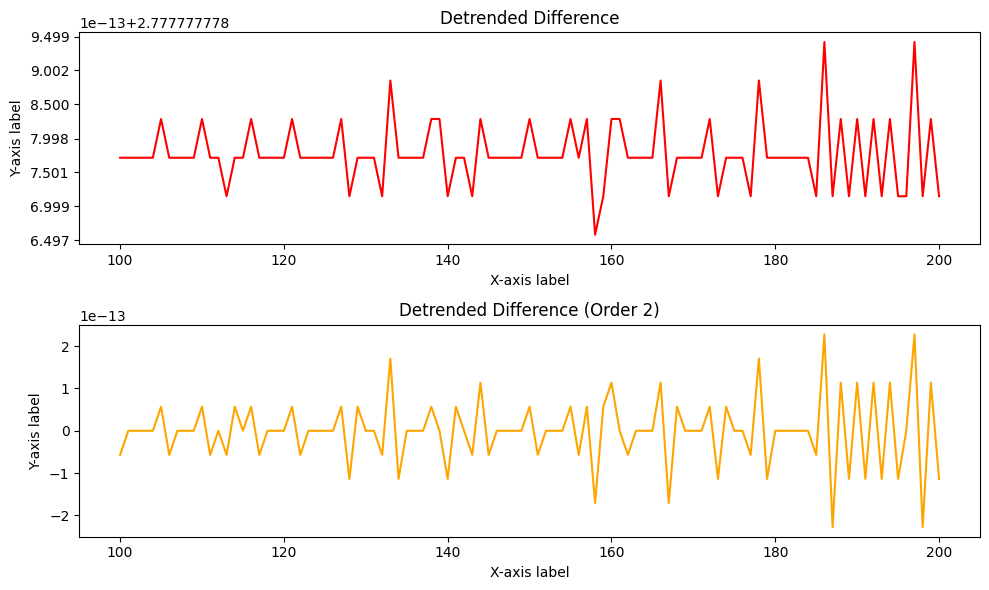

In [46]:
plt.figure(figsize=(10, 6))

# Plot detrended differences
plt.subplot(2, 1, 1)  # (rows, columns, index)
data_119['detrended_diff'].loc[100:200].plot(color='red', label='Detrended Difference')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference')

# Plot second-order detrended differences
plt.subplot(2, 1, 2)  # (rows, columns, index)
data_119['detrended_diff_2'].loc[100:200].plot(color='orange', label='Detrended Difference (Order 2)')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Detrended Difference (Order 2)')

plt.tight_layout()
plt.show()


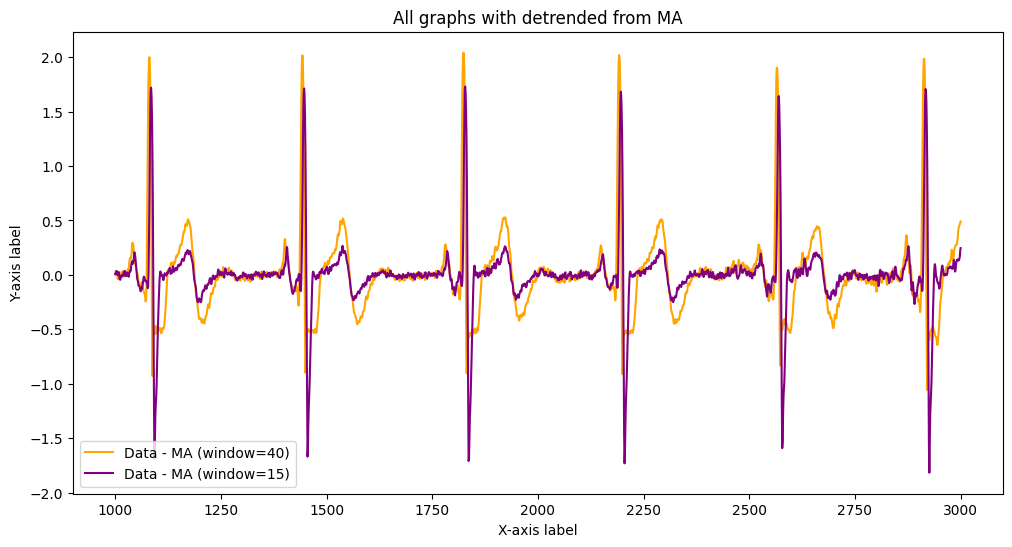

In [47]:
# Calculate data minus moving average
data_minus_ma_15 = data_106[columns_106[2]].loc[1000:3000] - moving_avg_106_15
data_minus_ma_40 = data_106[columns_106[2]].loc[1005:3005] - moving_avg_106_40

plt.figure(figsize=(12, 6))
plt.plot(x, data_minus_ma_40, color='orange', label='Data - MA (window=40)')
plt.plot(x, data_minus_ma_15, color='purple', label='Data - MA (window=15)')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('All graphs with detrended from MA')
plt.legend()
plt.show()


In [48]:
# #  seasonality for 100 additive model
# from statsmodels.tsa.seasonal import seasonal_decompose


# decomposition = seasonal_decompose(data_100[columns_100[2]], model='additive', period=300)
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid





In [49]:
# adjusted_series = data_100[columns_100[2]] - seasonal-trend
# plt.figure(figsize=(12, 6))
# adjusted_series.loc[100:700].plot()
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# # plt.legend()
# plt.grid(True)
# plt.show()

In [50]:
# null_count = residual.isnull().sum()
# residual.dropna(inplace=True)

In [51]:
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(residual, order=(2,1,0))
# model_new = model.fit()
# print(model_new.summary())

In [52]:
# predictions = model_new.predict()
# plt.plot(residual.iloc[50:200],label='Residuals')
# plt.plot(predictions.iloc[50:200], color='red',label='Predictions')
# plt.xlabel('Time(360ticks/s) ')
# plt.ylabel('uV')
# plt.title('ARIMA(2,1,0) Model')
# plt.legend()
# plt.show()

In [53]:
# from statsmodels.tsa.arima.model import ARIMA
# model2 = ARIMA(residual, order=(2,0,0))
# model_new2 = model2.fit()
# print(model_new2.summary())

In [54]:
# predictions2 = model_new2.predict()
# plt.plot(residual.iloc[50:200],label='Residuals')
# plt.plot(predictions2.iloc[50:200], color='red',label='Predictions')
# plt.xlabel('Time(360ticks/s) ')
# plt.ylabel('uV')
# plt.title('ARIMA(2,0,0) Model')
# plt.legend()
# plt.show()

In [55]:
# from statsmodels.tsa.arima.model import ARIMA
# model3 = ARIMA(residual, order=(0,0,2))
# model_new3 = model3.fit()
# print(model_new3.summary())

In [56]:
# predictions3 = model_new3.predict()
# plt.plot(residual.iloc[50:200],label='Residuals')
# plt.plot(predictions3.iloc[50:200], color='red',label='Predictions')
# plt.xlabel('Time(360ticks/s) ')
# plt.ylabel('uV')
# plt.title('ARIMA(0,0,2) Model')
# plt.legend()
# plt.show()

In [57]:
# from statsmodels.tsa.arima.model import ARIMA
# model5 = ARIMA(residual, order=(2,1,2))
# model_new5 = model5.fit()
# print(model_new5.summary())

In [58]:
# predictions5 = model_new5.predict()
# plt.plot(residual.  iloc[50:200],label='Residuals')
# plt.plot(predictions5.iloc[50:200], color='red',label='Predictions')
# plt.xlabel('Time(360ticks/s) ')
# plt.ylabel('uV')
# plt.title('ARIMA(2,1,2) Model')
# plt.legend()
# plt.show()

In [59]:
# from statsmodels.graphics.tsaplots import plot_acf



# plot_acf(residual.loc[0:10000], lags=50, ax=plt.gca())  # Adjust the number of lags as needed

# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')


In [60]:
# plt.figure(figsize=(12, 8))
# plt.subplot(411)
# data_100[columns_100[2]].loc[100:700].plot(label='Original')
# plt.legend(loc='best')
# plt.subplot(412)

# seasonal.loc[100:700].plot(label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(413)
# residual.loc[100:700].plot(label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

In [61]:
# #  seasonality for 106 additive model
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Assuming 'time_ms' is the timestamp column in your dataset
# decomposition = seasonal_decompose(data_106[columns_106[2]], model='additive', period=300)
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid


In [62]:
# null_count = residual.isnull().sum()
# residual.dropna(inplace=True)

In [63]:
# from statsmodels.graphics.tsaplots import plot_acf



# plot_acf(residual.loc[0:10000], lags=50, ax=plt.gca())  # Adjust the number of lags as needed

# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')


In [64]:
# adjusted_series = data_106[columns_106[2]] - seasonal-trend
# plt.figure(figsize=(12, 6))
# adjusted_series.loc[200:1000].plot()
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# # plt.legend()
# plt.grid(True)
# plt.show()

In [65]:
# plt.figure(figsize=(12, 8))
# plt.subplot(411)
# data_106[columns_106[2]].loc[100:1000].plot(label='Original')
# plt.legend(loc='best')
# plt.subplot(412)

# seasonal.loc[100:1000].plot(label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(413)
# residual.loc[100:1000].plot(label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

In [66]:
#  seasonality for 114 additive model
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(data_114[columns_114[3]], model='additive', period=300)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [67]:
null_count = residual.isnull().sum()
residual.dropna(inplace=True)

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(residual, order=(2,1,0))
model_new = model.fit()
print(model_new.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(2, 1, 0)   Log Likelihood             1487886.247
Date:                Fri, 10 May 2024   AIC                       -2975766.494
Time:                        19:28:03   BIC                       -2975732.341
Sample:                             0   HQIC                      -2975756.929
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2745      0.001   2249.776      0.000       1.273       1.276
ar.L2         -0.4582      0.001   -710.368      0.000      -0.459      -0.457
sigma2         0.0006   7.55e-07    794.804      0.0

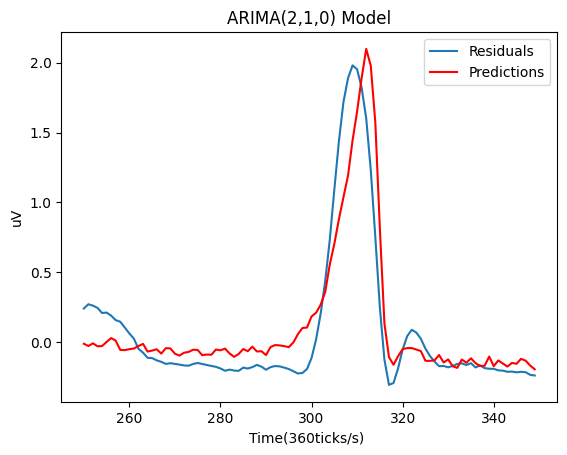

In [79]:
predictions = model_new.predict()
plt.plot(residual.iloc[100:200],label='Residuals')
plt.plot(predictions.iloc[100:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(2,1,0) Model')
plt.legend()
plt.show()

In [80]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(residual, order=(2,0,0))
model_new2 = model2.fit()
print(model_new2.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(2, 0, 0)   Log Likelihood             1387066.641
Date:                Fri, 10 May 2024   AIC                       -2774125.282
Time:                        19:44:13   BIC                       -2774079.745
Sample:                             0   HQIC                      -2774112.529
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.302e-05      0.002     -0.005      0.996      -0.005       0.005
ar.L1          1.8974      0.000   1.06e+04      0.000       1.897       1.898
ar.L2         -0.9163      0.000  -5361.017      0.0

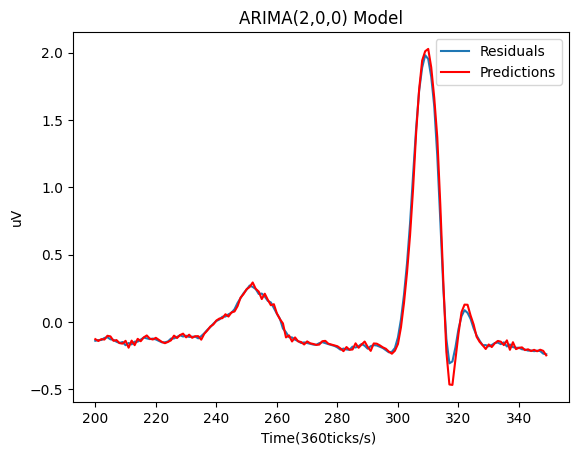

In [81]:
predictions2 = model_new2.predict()
plt.plot(residual.iloc[50:200],label='Residuals')
plt.plot(predictions2.iloc[50:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(2,0,0) Model')
plt.legend()
plt.show()

In [82]:
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(residual, order=(0,0,2))
model_new3 = model3.fit()
print(model_new3.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(0, 0, 2)   Log Likelihood              331368.320
Date:                Fri, 10 May 2024   AIC                        -662728.639
Time:                        19:48:53   BIC                        -662683.102
Sample:                             0   HQIC                       -662715.887
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.62e-05      0.001     -0.017      0.986      -0.002       0.002
ma.L1          1.7658      0.000   3672.639      0.000       1.765       1.767
ma.L2          0.9175      0.000   1910.457      0.0

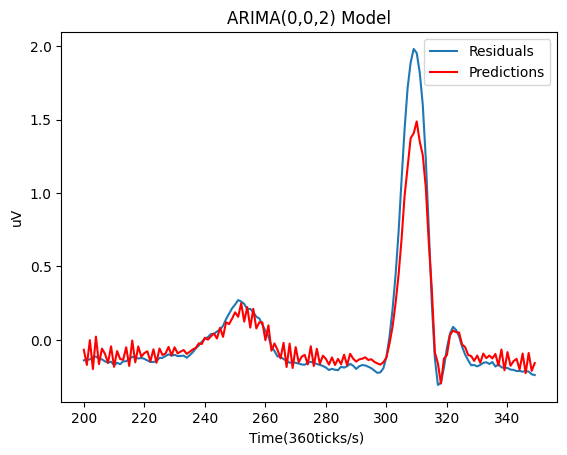

In [83]:
predictions3 = model_new3.predict()
plt.plot(residual.iloc[50:200],label='Residuals')
plt.plot(predictions3.iloc[50:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(0,0,2) Model')
plt.legend()
plt.show()

In [84]:
from statsmodels.tsa.arima.model import ARIMA
model5 = ARIMA(residual, order=(2,1,2))
model_new5 = model5.fit()
print(model_new5.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(2, 1, 2)   Log Likelihood             1518121.170
Date:                Fri, 10 May 2024   AIC                       -3036232.339
Time:                        19:54:44   BIC                       -3036175.418
Sample:                             0   HQIC                      -3036216.398
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5094      0.001   2010.842      0.000       1.508       1.511
ar.L2         -0.6797      0.001   -941.552      0.000      -0.681      -0.678
ma.L1         -0.3625      0.001   -390.942      0.0

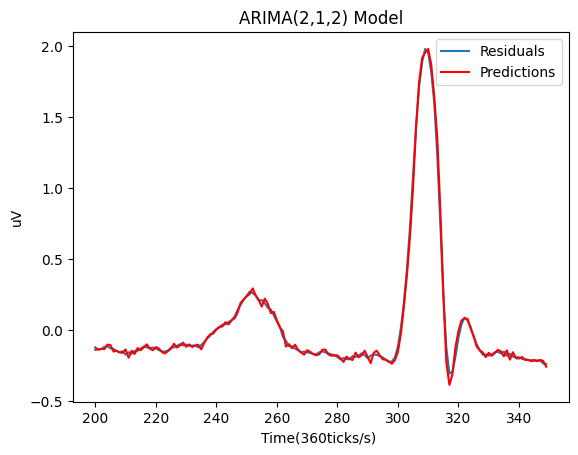

In [85]:
predictions5 = model_new5.predict()
plt.plot(residual.  iloc[50:200],label='Residuals')
plt.plot(predictions5.iloc[50:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(2,1,2) Model')
plt.legend()
plt.show()

Text(0, 0.5, 'Autocorrelation')

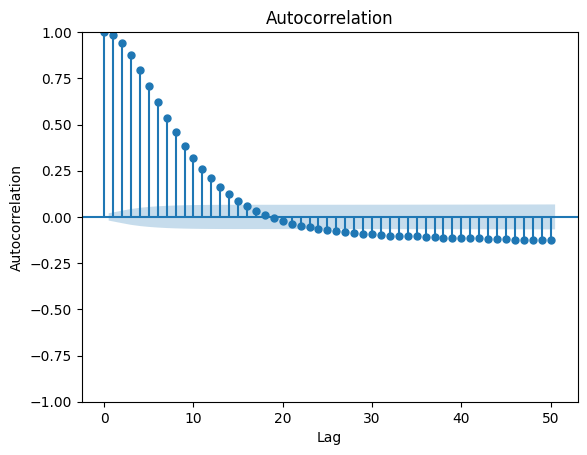

In [70]:
from statsmodels.graphics.tsaplots import plot_acf



plot_acf(residual.loc[0:10000], lags=50, ax=plt.gca())  # Adjust the number of lags as needed

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')


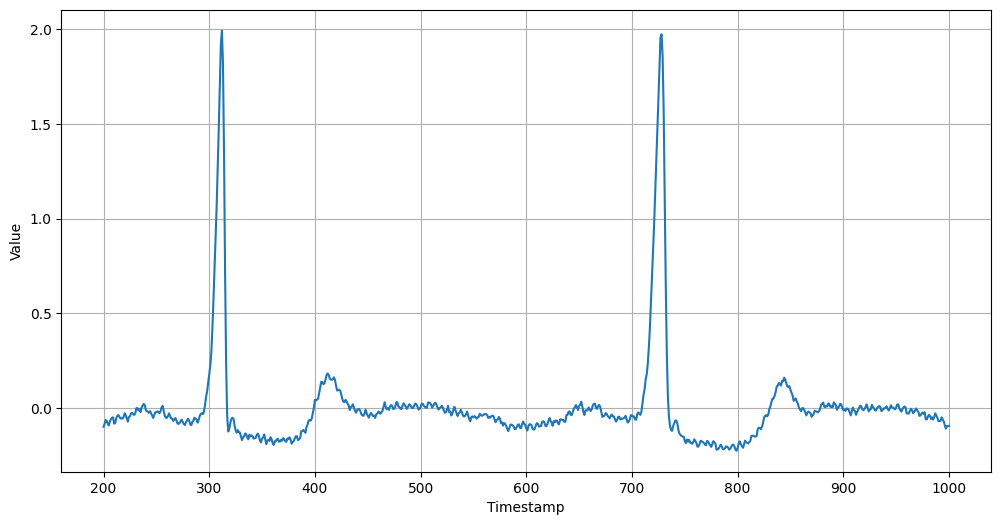

In [71]:
adjusted_series = data_114[columns_114[3]] - seasonal-trend
plt.figure(figsize=(12, 6))
adjusted_series.loc[200:1000].plot()
plt.xlabel('Timestamp')
plt.ylabel('Value')
# plt.legend()
plt.grid(True)
plt.show()

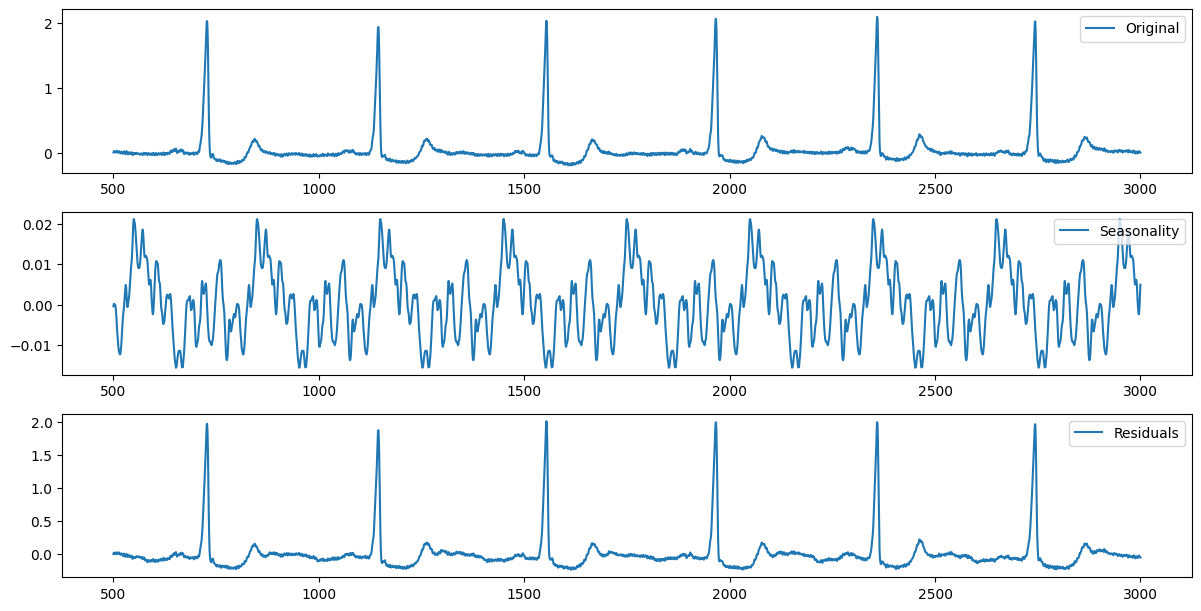

In [72]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
data_114[columns_114[3]].loc[500:3000].plot(label='Original')
plt.legend(loc='best')
plt.subplot(412)

seasonal.loc[500:3000].plot(label='Seasonality')
plt.legend(loc='best')
plt.subplot(413)
residual.loc[500:3000].plot(label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [97]:
#seasonality for 119 additive model
from statsmodels.tsa.seasonal import seasonal_decompose



# Perform seasonal decomposition
decomposition_119 = seasonal_decompose(data_119[columns_119[2]], model='additive', period=300)  # Adjust the period as needed

trend = decomposition_119.trend
seasonal = decomposition_119.seasonal
residual = decomposition_119.resid

# plt.figure(figsize=(12, 8))
# plt.subplot(411)
# data_119[columns_119[2]].loc[500:3000].plot(label='Original')
# plt.legend(loc='best')
# plt.subplot(412)

# seasonal.loc[500:3000].plot(label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(413)
# residual.loc[500:3000].plot(label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()


In [98]:
null_count = residual.isnull().sum()
residual.dropna(inplace=True)

In [99]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(residual, order=(2,1,0))
model_new = model.fit()
print(model_new.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(2, 1, 0)   Log Likelihood             1445087.677
Date:                Fri, 10 May 2024   AIC                       -2890169.354
Time:                        20:39:57   BIC                       -2890135.201
Sample:                             0   HQIC                      -2890159.789
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3589      0.001   2214.905      0.000       1.358       1.360
ar.L2         -0.4985      0.001   -802.515      0.000      -0.500      -0.497
sigma2         0.0007   9.75e-07    702.177      0.0

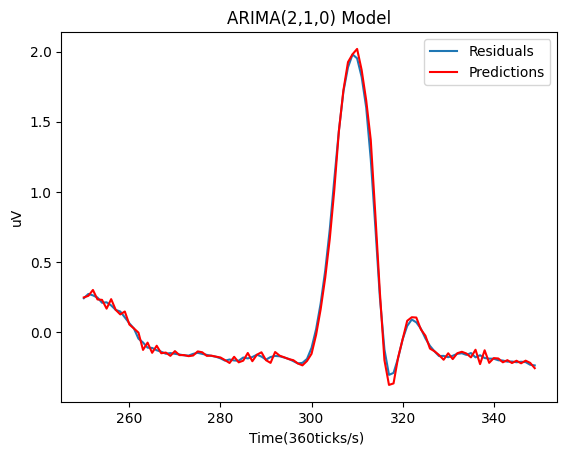

In [101]:
predictions = model_new.predict()
plt.plot(residual.iloc[100:200],label='Residuals')
plt.plot(predictions.iloc[100:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(2,1,0) Model')
plt.legend()
plt.show()

In [90]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(residual, order=(2,0,0))
model_new2 = model2.fit()
print(model_new2.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(2, 0, 0)   Log Likelihood             1387066.641
Date:                Fri, 10 May 2024   AIC                       -2774125.282
Time:                        20:07:36   BIC                       -2774079.745
Sample:                             0   HQIC                      -2774112.529
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.302e-05      0.002     -0.005      0.996      -0.005       0.005
ar.L1          1.8974      0.000   1.06e+04      0.000       1.897       1.898
ar.L2         -0.9163      0.000  -5361.017      0.0

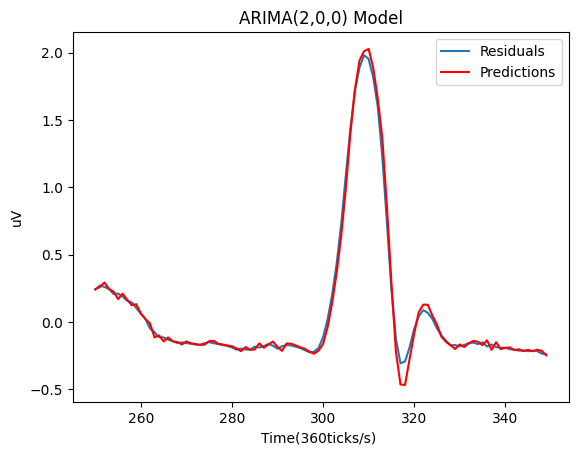

In [102]:
predictions2 = model_new2.predict()
plt.plot(residual.iloc[100:200],label='Residuals')
plt.plot(predictions2.iloc[100:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(2,0,0) Model')
plt.legend()
plt.show()

In [92]:
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(residual, order=(0,0,2))
model_new3 = model3.fit()
print(model_new3.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(0, 0, 2)   Log Likelihood              331368.320
Date:                Fri, 10 May 2024   AIC                        -662728.639
Time:                        20:11:47   BIC                        -662683.102
Sample:                             0   HQIC                       -662715.887
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.62e-05      0.001     -0.017      0.986      -0.002       0.002
ma.L1          1.7658      0.000   3672.639      0.000       1.765       1.767
ma.L2          0.9175      0.000   1910.457      0.0

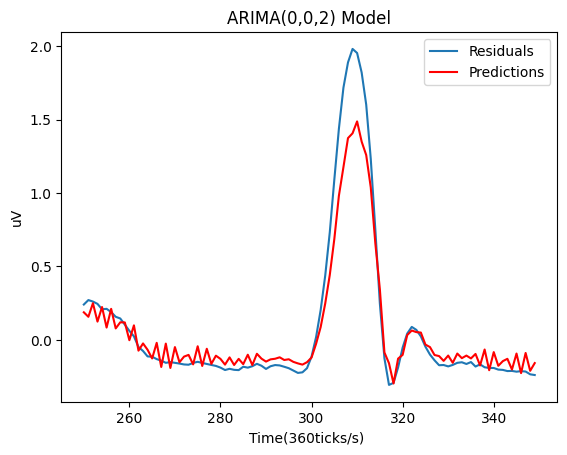

In [103]:
predictions3 = model_new3.predict()
plt.plot(residual.iloc[100:200],label='Residuals')
plt.plot(predictions3.iloc[100:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(0,0,2) Model')
plt.legend()
plt.show()

In [94]:
from statsmodels.tsa.arima.model import ARIMA
model5 = ARIMA(residual, order=(2,1,2))
model_new5 = model5.fit()
print(model_new5.summary())

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:               649700
Model:                 ARIMA(2, 1, 2)   Log Likelihood             1518121.170
Date:                Fri, 10 May 2024   AIC                       -3036232.339
Time:                        20:16:44   BIC                       -3036175.418
Sample:                             0   HQIC                      -3036216.398
                             - 649700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5094      0.001   2010.842      0.000       1.508       1.511
ar.L2         -0.6797      0.001   -941.552      0.000      -0.681      -0.678
ma.L1         -0.3625      0.001   -390.942      0.0

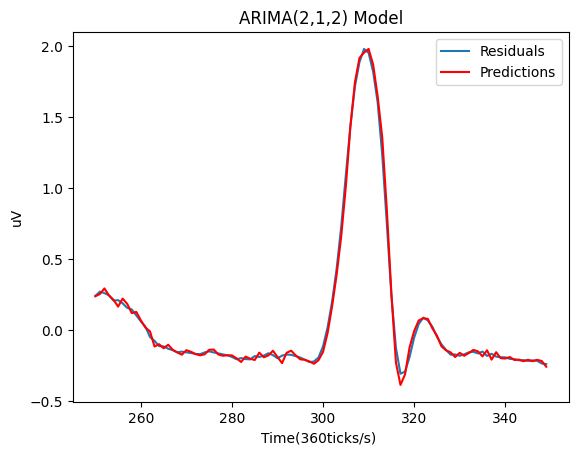

In [104]:
predictions5 = model_new5.predict()
plt.plot(residual.  iloc[100:200],label='Residuals')
plt.plot(predictions5.iloc[100:200], color='red',label='Predictions')
plt.xlabel('Time(360ticks/s) ')
plt.ylabel('uV')
plt.title('ARIMA(2,1,2) Model')
plt.legend()
plt.show()

Text(0, 0.5, 'Autocorrelation')

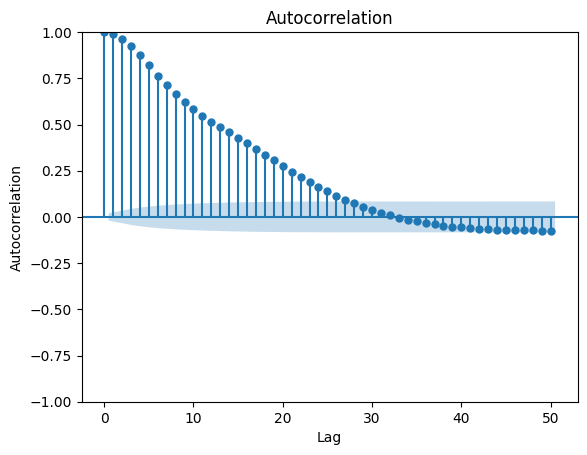

In [75]:
from statsmodels.graphics.tsaplots import plot_acf



plot_acf(residual.loc[0:10000], lags=50, ax=plt.gca())  # Adjust the number of lags as needed

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')


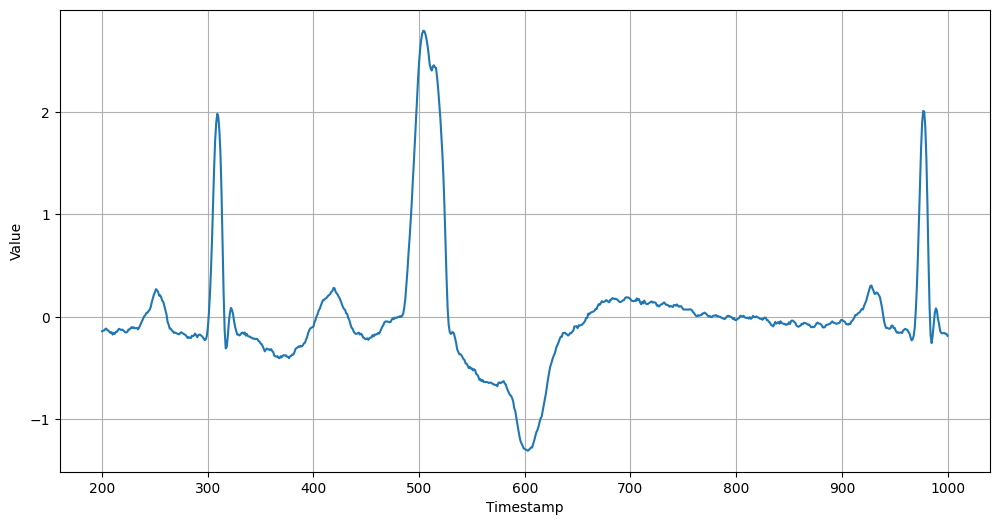

In [76]:
adjusted_series = data_119[columns_119[2]] - seasonal-trend
plt.figure(figsize=(12, 6))
adjusted_series.loc[200:1000].plot()
plt.xlabel('Timestamp')
plt.ylabel('Value')
# plt.legend()
plt.grid(True)
plt.show()

In [77]:
# #  seasonality for 100 multiplicative model
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Assuming 'time_ms' is the timestamp column in your dataset
# time_series = data_100.set_index('time_ms')[columns_100[2]]  # Extract the time series data for column 2

# # Select the specific range from index 100 to 200
# time_series_subset = time_series.iloc[100:201]  # Adjust the range as needed

# # Perform seasonal decomposition
# decomposition = seasonal_decompose(time_series_subset, model='multiplicative', period=2)  # Adjust the period as needed

# # Plot the decomposed components
# decomposition.plot()
# # plt.show()


# #it gave error becasuse we have negative values in dataset

ValueError: x and y must have same first dimension, but have shapes (2001,) and (2102,)

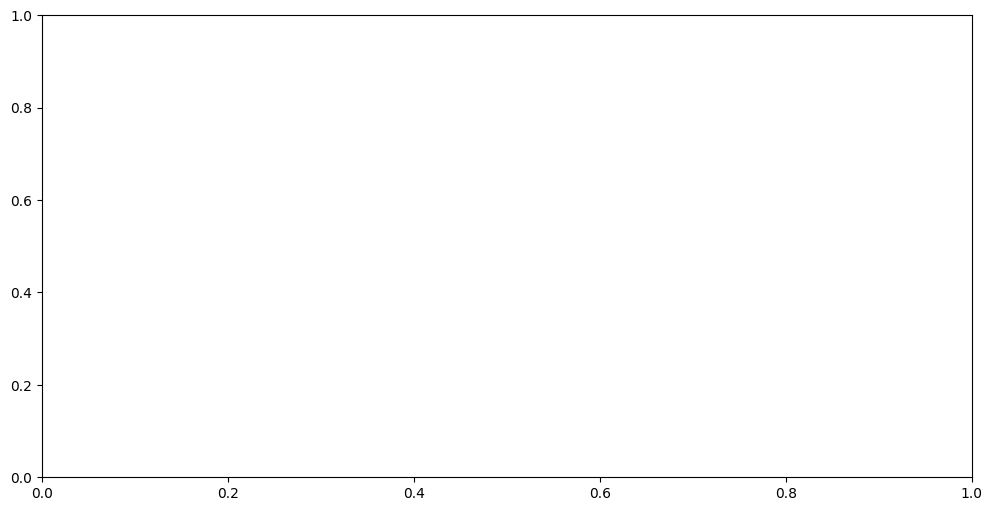

In [78]:
# Calculate data minus moving average
data_minus_ma_15 = data_106[columns_106[2]].loc[100:200] - moving_avg_106_15
data_minus_ma_40 = data_106[columns_106[2]].loc[105:205] - moving_avg_106_40

data_minus_ma_15.fillna(0, inplace=True)
data_minus_ma_40.fillna(0, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(x, data_minus_ma_40, color='orange', label='Data - MA (window=40)')
plt.plot(x, data_minus_ma_15, color='purple', label='Data - MA (window=15)')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('All graphs with detrended from MA')
plt.legend()
plt.show()


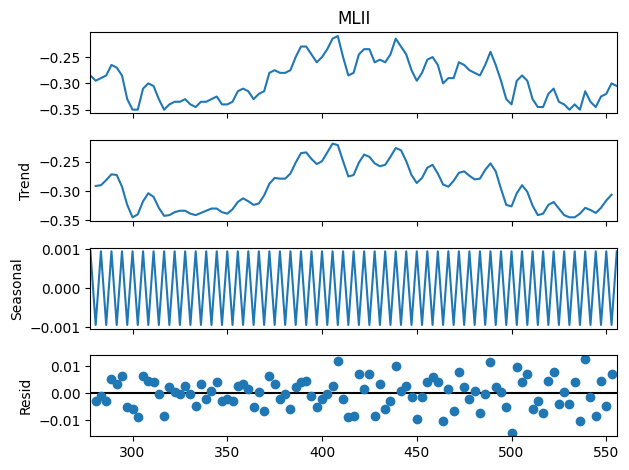

In [ ]:
#  seasonality for 106 additive model
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'time_ms' is the timestamp column in your dataset
time_series = data_106.set_index('time_ms')[columns_106[2]]  # Extract the time series data for column 2

# Select the specific range from index 100 to 200
time_series_subset = time_series.iloc[100:201]  # Adjust the range as needed

# Perform seasonal decomposition
decomposition_106 = seasonal_decompose(time_series_subset, model='additive', period=2)  # Adjust the period as needed

# Plot the decomposed components
decomposition_106.plot()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2001,) and (2102,)

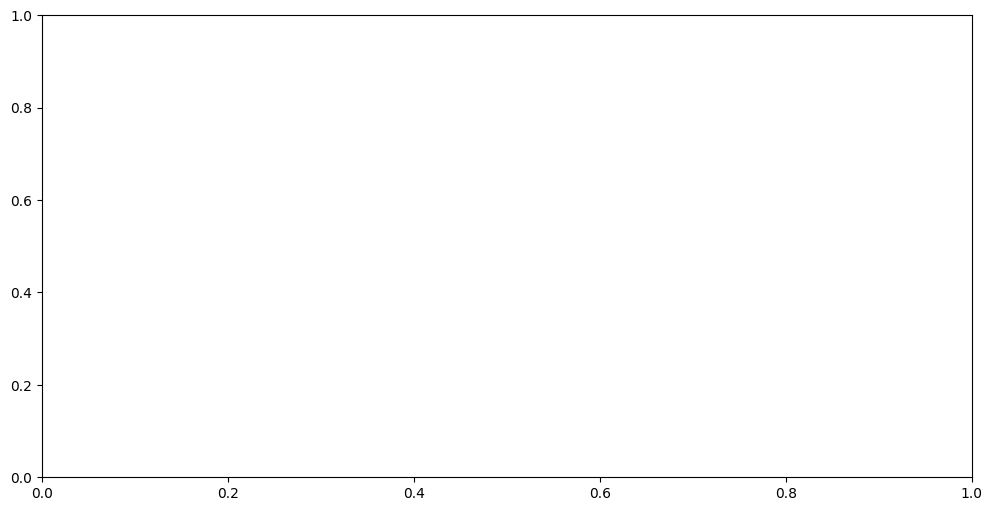

In [ ]:
# Calculate residuals
residuals_15 = data_minus_ma_15 - decomposition_106.seasonal
residuals_40 = data_minus_ma_40 - decomposition_106.seasonal

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(x, residuals_40, color='orange', label='Residuals (window=40)')
plt.plot(x, residuals_15, color='purple', label='Residuals (window=15)')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Residuals from Moving Average Detrending')
plt.legend()
plt.show()
